In [1]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy.stats import norm, t, jarque_bera
import scipy.optimize as optimize
import pandas_datareader as web

## Q1 Corr coef

In [2]:
mu = np.array([0.01, 0.05])
sigma = np.array([0.25, 0.15])
nsim = 100

In [3]:
def my_func(rho, mu = mu, sigma = sigma, nsim = nsim):
    cov = np.array([[sigma[0]**2, rho*sigma[0]*sigma[1]],
    [rho*sigma[0]*sigma[1], sigma[1]**2]])    ## CoV matirx(2*2)
    mvn = multivariate_normal(mean = mu, cov = cov)
    X = mvn.rvs(size = nsim)
    plt.figure(figsize = (6, 6))
    plt.scatter(X[:, 0], X[:, 1])
    plt.title('rho = {} '.format(rho))
    plt.show()
    print('The joint probability is %.3f' % (mvn.cdf([0, 0])))     ## Joint prob

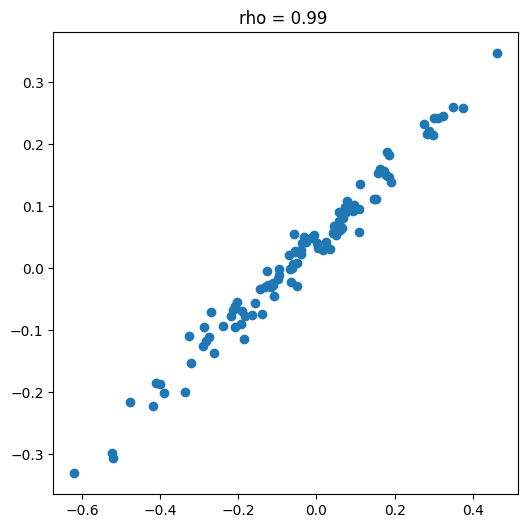

The joint probability is 0.369


In [4]:
# 1(a)
np.random.seed(1)
my_func(0.99)

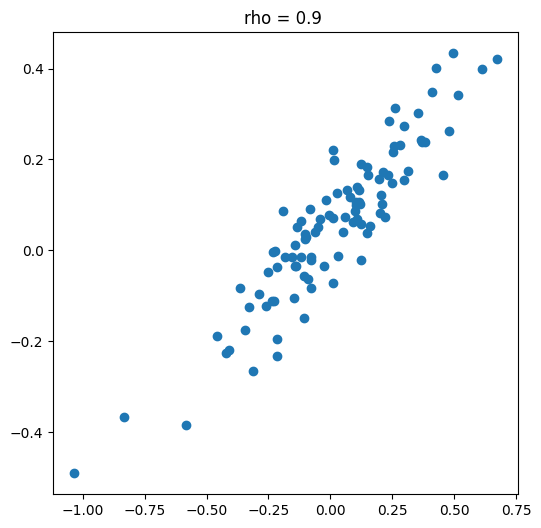

The joint probability is 0.342


In [5]:
# 1(b)
np.random.seed(2)
my_func(0.9)

1.C

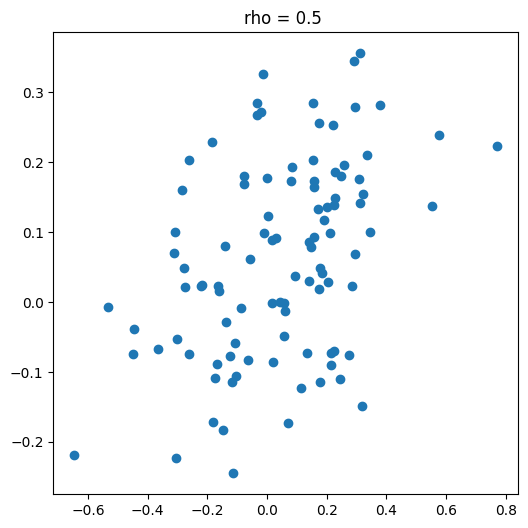

The joint probability is 0.257


In [6]:
np.random.seed(3)
my_func(0.5)

1.D

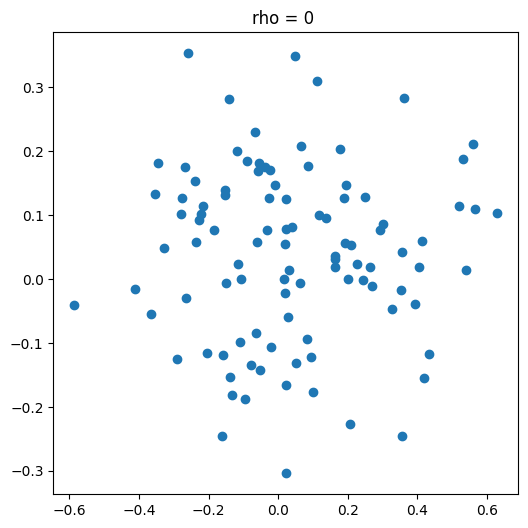

The joint probability is 0.179


In [7]:
np.random.seed(4)
my_func(0)

1.E

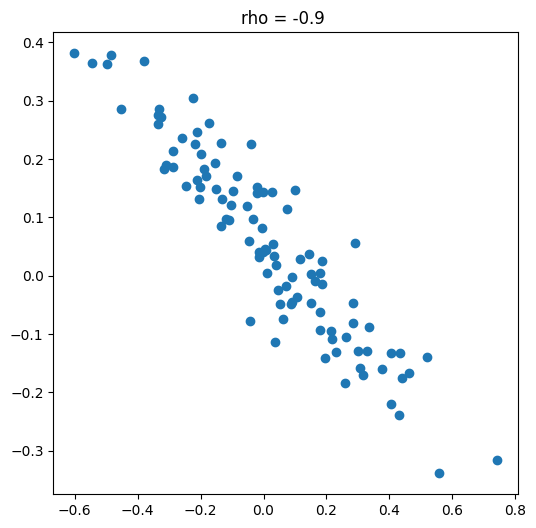

The joint probability is 0.020


In [8]:
np.random.seed(5)
my_func(-0.9)

## Q2

In [12]:
import yfinance as yf

# Get data
df = yf.download("MSFT", start="2010-01-02", end="2021-02-02")

# Reset index
df.reset_index(inplace=True)
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431591,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439154,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295313,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053057,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212042,51197400
...,...,...,...,...,...,...,...
2784,2021-01-26,231.860001,234.179993,230.080002,232.330002,225.836105,49169600
2785,2021-01-27,238.000000,240.440002,230.139999,232.899994,226.390152,69870600
2786,2021-01-28,235.610001,242.639999,235.089996,238.929993,232.251617,49111200
2787,2021-01-29,235.990005,238.020004,231.350006,231.960007,225.476440,42503100


In [13]:
cc = np.log(df['Adj Close']/df['Adj Close'].shift(1))
cc = np.array(cc)[1:]
T = len(cc)

2.A

In [17]:
def log_lik(params, data):
    mu, sigma = params
    # If the standard deviation prameter is negative, return a large value:
    if sigma < 0:
        return(1e8)
    # The likelihood function values:
    lik = norm.pdf(data, loc = mu, scale = sigma)
    return -np.mean(np.log(lik))

## MLE estimate
res = optimize.minimize(fun = log_lik, x0 = [0.1, 0.1], args = cc)   # Guess

In [18]:
print(res)
params = res.x
vcov = res.hess_inv/T
t_stat = np.abs((params[0] - 0) / np.sqrt(vcov[0, 0]))
p_val = (1 - t.cdf(t_stat, df = T - 2)) * 2
print("The p-value is %.4f" % p_val)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -2.7152684525633375
        x: [ 8.238e-04  1.602e-02]
      nit: 17
      jac: [ 3.213e-05  3.913e-05]
 hess_inv: [[ 2.552e-04  2.080e-06]
            [ 2.080e-06  1.266e-04]]
     nfev: 135
     njev: 41
The p-value is 0.0065


### reject H0 at a 1% significance level

2.B

In [27]:
sample_skewness = np.mean((cc - params[0]) ** 3) / (params[1] ** 3)
sample_kurtosis = np.mean((cc - params[0]) ** 4) / (params[1] ** 4) - 3
print('Skewness is :',sample_skewness1,'kurtosis is :',sample_kurtosis2)

Skewness is : -0.2451424229051208 kurtosis is : 10.32390725036828


In [28]:
## noted that both skewness and kurtosis aren't equal to zero

2.C

In [29]:
test = jarque_bera(cc)
print(test)
print("The p-value is {:.3f}, which suggests the daily cc returns do not have normal distribution. ".format(test.pvalue))

SignificanceResult(statistic=12409.30336121341, pvalue=0.0)
The p-value is 0.000, which suggests the daily cc returns do not have normal distribution. 


2.D

No. The maximum likelihood estimates are obtained by fitting a normal distribution to the daily cc returns.
But the daily cc returns do not follow a normal distribution.